From the previous class, we saw what is linear regression. 

How can we calculate the parameters (w0, w1) or (m,c) of linear regression 

using Analytically and using Gradient Descent. 

The complete code is below 

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473


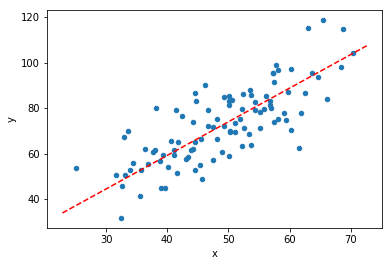

In [1]:
#The optimal values of m and b can be actually calculated with way less effort than doing a linear regression. 
#this is just to demonstrate gradient descent

from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run():
    points = genfromtxt("linear_regression_live/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    
    ### plotting code
    import pandas as pd 
    import matplotlib.pyplot as plt
    %matplotlib inline

    data = pd.read_csv('linear_regression_live/data.csv', header=None, names=["x","y"])
    data.head()
    data.plot(kind="scatter", x="x", y="y")
    import numpy as np 
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = b + m * x_vals
    plt.plot(x_vals, y_vals, '--', c="r")
    

if __name__ == '__main__':
    run()

Keep in mind that this is just for a case where we have one independent (age) variable and 1 dependent (income) variable. 

Or our equation is just like 

```
y = w0 + w1x 
```

So we have only 2 parameters. To calculate for that we, had to get the gradient in each parameter and then update our parameters values using gradient descent. 


Suppose life is not easy and income is not dependent on age. 
It is dependent on many factors like age, education, college, median family income or other parameters. 

The our equation will look like

```
income = w0 + w1 * age + w2 * education + w3 * college + w4 * father_income + ....
```

There are 2 things to observe here. 

1. This equation is still linear. There are no quadratic / cubin / polynomial terms. All the independent variables are in the power of 1. So this will still be linear and instead of a line, we will find a plane. 

2. Since we have so many parameters now, so we need to identify the gradient in respect of all parameters. We thought in 2 it was difficult. What will happen with this 5. 

Actually, if we want, we can do that, but it's not in the scope of the course. You can look at any good machine learning book like ISLR and you will find the proof, on how to do that. 



What we see is that we understand how things work? 

1. What is independent and dependent variable?
2. What is gradient descent?
3. How it works and get's us to loss function minimization?

So the question comes, do we need to do all this everytime. The answer is **NO**. There are many libraries, which do all the heavy work for us and we just need to pass the data and the requirment of what we want. 

They will do everything, from applying gradient descent to get the parameters and it doesn't matter how many of them are there. 


In python this is done by **sk-learn** library. It has all the functions to do machine learning. 

First let's see what is sk-learn. 

This is the website  https://scikit-learn.org/stable/

![](sklearn.png)

So it has many of the algorithms. Now why should you use. Because of the code below

In [ ]:
from sklearn import linear_model 
import pandas as pd
points = pd.read_csv('linear_regression_live/data.csv', header=None, names=["x","y"])

# print(points)
X = points.x.values.reshape(-1,1)
Y = points.y

In [27]:
## Actual linear regression. 

reg = linear_model.LinearRegression()
reg.fit(X,Y)
print(reg.coef_, reg.intercept_)

[1.32243102] 7.991020982270399


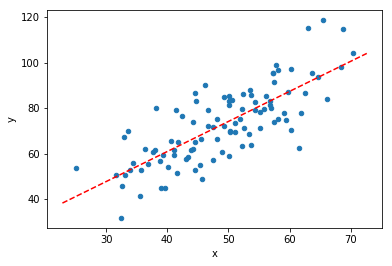

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('linear_regression_live/data.csv', header=None, names=["x","y"])
data.head()
data.plot(kind="scatter", x="x", y="y")
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = reg.coef_ * x_vals + reg.intercept_
plt.plot(x_vals, y_vals, '--', c="r")

These are the 3 lines which did all the work 

```
## Actual linear regression. 

reg = linear_model.LinearRegression()
reg.fit(X,Y)
print(reg.coef_, reg.intercept_)
```

Also, 1 line is about printing. From 45 lines to 3 lines. 

That's the power of sklearn. This is how work is done in real world. We use libraries to help us reduce our work. 

It doesn't mean that what we did yesterday for 2 hours is wasted. It's not. If you don't know that , you can find the line but you will find situations where line will not work and then you need to go to basics. 

So that is the power of sk-learn. let's break each line 1 by 1 

In [30]:
from sklearn import linear_model 



The above line we are importing the linear_model module of sklearn library. 
`linear_model` module contains many algorithms which are linear in nature, e.g. Linear Regression, Logistic Regression and others. 

So we just imported the linear_model module. 

In [31]:
reg = linear_model.LinearRegression()



Here we are making an object of LinearRegression() class. sk-learn has a class for each of the algorithms present and some other helper classes. Since we are learning Linear Regression so we made an object of that class. 

In [32]:
reg.fit(X,Y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

This is the important part of what we are doing. 

First X and y 

**X :  This is the input data in numpy array format. By input data I mean `age`. This has to be 2-D array format.**

**Y : This is the output data in the numpy array format. E.g. `Income`**


If we are doing the problem of only age and income and suppose there are 20 points 

**X** will be of shape **(20,1)**
**Y** will be of shape **(20,) 1-D** 

Suppose we take a different problem finding income by many variable like age, education, family_income, college 
So we have 4 variables, so 

**X** will be of shape **(20,4)**
**Y** will be of shape **(20,)**

**So X will be in 2D always, and Y will be in 1-D for linear regression. **

# Training  `fit()`

What the fit function does is it takes the data and then trains using the algorithm provided to fit the line. 

We want the line's parameters. So .fit applies gradient descent on the data and calculates those values. 

This fit is common for all the algorithms in sklearn. No matter what algorithm you use you will always find the **fit()** method in that object. That's why sklearn is simple. The syntax is same for all the algorithms. 

Training the data is also called fitting the data is also called model training. 

All 3 are used interchangably. 


In [34]:
print(reg.coef_, reg.intercept_)



[1.32243102] 7.991020982270399


### Results

Once the data is trained or gradient descent is run then we get the results. We get the results in 2 parts 

**coef__** : This contains the coefficients (not the intercept for all the variables). Since we have only 1 variable so we have 1 coefficient. If have multiple like `college, family, education` We will have more. 

**intercept__** : This is the intercept or **C** or **w0**. 



### Process 

In simple words we have 3 tasks to do with sklearn

1. Load and pre process the data for input to algorithm 
2. Train the model / Fit the data 
3. View Results. 

## Is our model Good?

So we have made the line and and line passes through center.

**But is our model good?** 

What is meant by goodness? 

Goodness means that our model can interpret the data. It can explain the data. 

Linear regression assumes that there is a linear relationship between our independent and dependent variable? 

Suppose there is a linear relationship and income is a function of age, education, college and family_income. 

Suppose that function is something like 

```
income = 2.3*age + 1.2*eduction + 2*college + .7 * family_income
```

This is the real function on which the income works. 

But we don't have the real function. We have data of around 100 people. We pass that data to linear Regression and it tells that from the data I can see the function as 

```
income = 1.5*age + 0.5*education + 1.3*college + 4*family_income
```

So our original and function from data is different. 

or in mathematical terms 

$$y \neq \hat y$$


as mentioned earlier $\hat{}$ means predicted function / value

Now our model will be perfect if  $$y = \hat{y}$$    but that will not be the case as we have only some of the data points. 

So goodness means, how far we are from the original function. But since we do not know the original function so we cannot compare ours with original. 

What we have is data. We can check, how good our function explains the data. Can it explain the full data e.g., if all the data points are colinear then did we get a line which passes through all the points. 

In that case we can say, our function explains all the data.

If it passes through 90% of the data then we can explain 90% of the data. 



What we have done here? For linear regression, if there is no error (remember error was our criteria to check if line is good) we can say we can explain the full data.

We need to formalize this in someway and that's were R-sqaured comes in picture.


### What is R-squared?

So we have a line, and we have original data points. What can we do?

We can check how far the original value is from the predicted data point. 

What is predicted data point? Suppose you have age 20, income 10000. You found a line on which when age is 20, income comes to 18000. 

So we can take all the original values and predicted values. 

If the difference between the original and predicted is small, then we can say we have good fit of a model. 

Here is the formula of R-Squared. 

$$R^2 = \frac{\text{Variance Explained By the model}}{\text{Total Variance}}$$


Total Variance , we kno how to calculate it's 

$$\sum (x - \bar{x})^2$$

Or we subtract each original value by mean, square it and sum all values 

In our case it will be 

$$\text{Total Variance} = \sum(income -\text{mean_income})^2$$

That is total variance, our denominator

Similary for Explained variance it will be 

$$\text{Model Explained Variance} = \sum(\hat{income} - \text{income})^2$$

Then we will just divide them as per formula and we have our result. 

Let's do this 

In [1]:
from sklearn import linear_model 
import pandas as pd
points = pd.read_csv('linear_regression_live/data.csv', header=None, names=["x","y"])

# print(points)
X = points.x.values.reshape(-1,1)
Y = points.y

## Actual linear regression. 

reg = linear_model.LinearRegression()
reg.fit(X,Y)
print(reg.coef_, reg.intercept_)

[1.32243102] 7.991020982270399


We will do all the calculation in dataframe only as it's faster. Suppose `y` is income

In [3]:
points.head()

,x,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [6]:
points['mean_y'] = points.y.mean()
points.head()

,x,y,mean_y
0,32.502345,31.707006,72.735051
1,53.426804,68.777596,72.735051
2,61.530358,62.562382,72.735051
3,47.475640,71.546632,72.735051
4,59.813208,87.230925,72.735051


In [8]:
points['y - mean_y sqr'] = (points.y - points.mean_y)**2
points.head()

,x,y,mean_y,y - mean_y,y - mean_y sqr
0,32.502345,31.707006,72.735051,-41.028045,1683.300452
1,53.426804,68.777596,72.735051,-3.957455,15.661447
2,61.530358,62.562382,72.735051,-10.172668,103.483179
3,47.475640,71.546632,72.735051,-1.188418,1.412338
4,59.813208,87.230925,72.735051,14.495875,210.130380


In [9]:
total_variance = points['y - mean_y sqr'].sum()

In [10]:
reg.predict(X)

array([ 50.97313068,  78.64428408,  89.36067528,  70.77427966,
        87.08986264,  80.9127616 ,  77.03752068,  59.96198716,
        71.60662047,  77.48479033,  68.05548117,  79.86730909,
        66.39493013,  84.9148112 ,  83.00884075,  72.73180677,
        67.0867556 ,  87.7300766 ,  68.31853072,  59.3235847 ,
        95.52248785,  94.4992372 ,  70.78164424,  62.97194057,
        76.55270453,  86.50483786,  83.77954744,  92.11821271,
        69.79829882,  74.84884901,  77.05365354,  55.02702285,
        64.11033459,  84.90961325,  84.03668646,  68.0829885 ,
        89.84450605,  51.75533073,  56.17513031,  57.81447577,
        66.91273975,  65.27646179,  74.20930217,  66.00688013,
        91.30084388,  51.19357794,  61.10897432,  78.84036556,
        52.77410942,  93.56174855,  58.40185886,  66.84255791,
        61.68111005,  63.16373769,  75.55221639,  80.82800368,
        62.7102102 ,  90.63594762,  73.05976831,  62.34648699,
        62.45139666,  74.35905937,  77.25790319,  74.29

In [12]:
points['predict_value'] = reg.predict(X)
points.head()

,x,y,mean_y,y - mean_y,y - mean_y sqr,predict_value
0,32.502345,31.707006,72.735051,-41.028045,1683.300452,50.973131
1,53.426804,68.777596,72.735051,-3.957455,15.661447,78.644284
2,61.530358,62.562382,72.735051,-10.172668,103.483179,89.360675
3,47.475640,71.546632,72.735051,-1.188418,1.412338,70.774280
4,59.813208,87.230925,72.735051,14.495875,210.130380,87.089863


In [13]:
points['predict_value - original'] = (points.predict_value - points.y) ** 2
points.head()

,x,y,mean_y,y - mean_y,y - mean_y sqr,predict_value,predict_value - original
0,32.502345,31.707006,72.735051,-41.028045,1683.300452,50.973131,371.183566
1,53.426804,68.777596,72.735051,-3.957455,15.661447,78.644284,97.351534
2,61.530358,62.562382,72.735051,-10.172668,103.483179,89.360675,718.148507
3,47.475640,71.546632,72.735051,-1.188418,1.412338,70.774280,0.596528
4,59.813208,87.230925,72.735051,14.495875,210.130380,87.089863,0.019899


In [15]:
model_variance = points['predict_value - original'].sum()
model_variance

11025.738346621316

In [17]:
R_squared = model_variance / total_variance
print(R_squared)

0.4013442084613381


This tells, that our model can only explain 40% of the data. 

Or our model is about to learn only 40% function from the original function. 

This can be done with sklearn also

In [20]:
from sklearn.metrics import r2_score 

print(r2_score(Y,reg.predict(X)))

0.5986557915386619


[Shit](https://github.com/scikit-learn/scikit-learn/blob/95d4f0841/sklearn/metrics/_regression.py#L600)

[Okaayyy](https://en.wikipedia.org/wiki/Coefficient_of_determination)

[Fine](https://stackoverflow.com/questions/23036866/scikit-learn-is-returning-coefficient-of-determination-r2-values-less-than-1)

[For interview and more Read this](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)

# Anscombe’s quartet

In [21]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

In [22]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


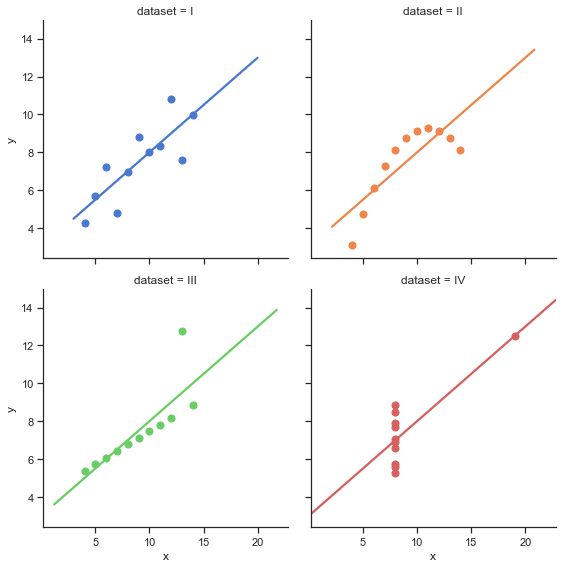

In [25]:
%matplotlib inline
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

 Assignment : Find their R^2 value 
 ------